<a href="https://colab.research.google.com/github/franciscodevs/Proyecto-de-Prediccion-de-Incendios/blob/main/Colab.Incendios_en_galicia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importacion de librerías y lectura del data frame**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [ ]:
#Uso este codigo para que sea mas rapido de leer simplemente, sino tardaria mucho mas
import io
import requests
url="https://raw.githubusercontent.com/TFM123456/Big_Data_and_Data_Science_UCM/main/datos_galicia_limpio.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode(encoding = "ISO-8859-1")))

# **ANALISIS PRELIMINAR**

In [ ]:
df.head()

Unnamed: 0          id  superficie  ...   Año  DIR_VIENTO  PRES_RANGE
0           1  2001150021         5.0  ...  2001           E         4.4
1           3  2001150094         1.5  ...  2001          NE         4.7
2           5  2001150145         1.5  ...  2001          NE         3.2
3           6  2001150151         1.1  ...  2001          NE         3.2
4           7  2001150153         1.5  ...  2001          NE         3.2

[5 rows x 29 columns]

In [ ]:
#Viendo dimensiones del df (29 variables o columnas y 12.976 observaciones o filas)
df.shape

(12976, 29)

In [ ]:
#Tipos de datos
df.dtypes

Unnamed: 0         int64
id                 int64
superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object

In [ ]:
#Totalidad de registros por columna (NO HAY DATOS FALTANTES)
df.count()

Unnamed: 0       12976
id               12976
superficie       12976
fecha            12976
lat              12976
lng              12976
idprovincia      12976
idmunicipio      12976
causa            12976
muertos          12976
heridos          12976
time_ctrl        12976
time_ext         12976
personal         12976
medios           12976
gastos           12976
ALTITUD          12976
TMEDIA           12976
PRECIPITACION    12976
TMIN             12976
TMAX             12976
VELMEDIA         12976
RACHA            12976
SOL              12976
Trimestre        12976
Mes              12976
Año              12976
DIR_VIENTO       12976
PRES_RANGE       12976
dtype: int64

In [ ]:
#Resumen               
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     12976 non-null  int64  
 1   id             12976 non-null  int64  
 2   superficie     12976 non-null  float64
 3   fecha          12976 non-null  object 
 4   lat            12976 non-null  float64
 5   lng            12976 non-null  float64
 6   idprovincia    12976 non-null  object 
 7   idmunicipio    12976 non-null  object 
 8   causa          12976 non-null  object 
 9   muertos        12976 non-null  int64  
 10  heridos        12976 non-null  int64  
 11  time_ctrl      12976 non-null  float64
 12  time_ext       12976 non-null  float64
 13  personal       12976 non-null  int64  
 14  medios         12976 non-null  int64  
 15  gastos         12976 non-null  object 
 16  ALTITUD        12976 non-null  object 
 17  TMEDIA         12976 non-null  float64
 18  PRECIP

In [ ]:
#Principales estadísticos
df.describe().T


count          mean  ...           75%           max
Unnamed: 0     12976.0  9.781431e+03  ...  1.495850e+04  2.054400e+04
id             12976.0  2.005867e+09  ...  2.009150e+09  2.015361e+09
superficie     12976.0  2.586703e+00  ...  3.000000e+00  1.020000e+01
lat            12976.0  4.255542e+01  ...  4.293220e+01  4.373071e+01
lng            12976.0 -7.994614e+00  ... -7.556844e+00 -6.771548e+00
muertos        12976.0  7.706535e-05  ...  0.000000e+00  1.000000e+00
heridos        12976.0  4.623921e-04  ...  0.000000e+00  1.000000e+00
time_ctrl      12976.0  1.781149e+00  ...  2.310000e+00  4.190000e+00
time_ext       12976.0  1.781149e+00  ...  2.310000e+00  4.190000e+00
personal       12976.0  1.228152e+01  ...  1.600000e+01  3.300000e+01
medios         12976.0  1.964396e+00  ...  3.000000e+00  8.000000e+00
TMEDIA         12976.0  1.658466e+01  ...  2.110000e+01  3.120000e+01
PRECIPITACION  12976.0  1.321671e-01  ...  0.000000e+00  1.000000e+00
TMIN           12976.0  9.717810e+00  ...  1.490000e+01  2.340000e+01
TMAX           12976.0  2.345237e+01  ...  2.840000e+01  4.200000e+01
RACHA          12976.0  8.537230e+00  ...  1.060000e+01  2.830000e+01
SOL            12976.0  8.547102e+00  ...  1.120000e+01  1.480000e+01
Año            12976.0  2.005593e+03  ...  2.009000e+03  2.015000e+03
PRES_RANGE     12976.0  3.836675e+00  ...  4.900000e+00  8.600000e+00

[19 rows x 8 columns]

In [ ]:
#Resumen: los datos están relacionados a incendios forestales. Presenta 29 variables y no cuenta con datos faltantes

# **ANALISIS UNIVARIADO**

In [ ]:
#Variable tiempo de extincion del incendio medida en minutos  
df.time_ext.describe()

count    12976.000000
mean         1.781149
std          0.894420
min          0.040000
25%          1.170000
50%          1.500000
75%          2.310000
max          4.190000
Name: time_ext, dtype: float64

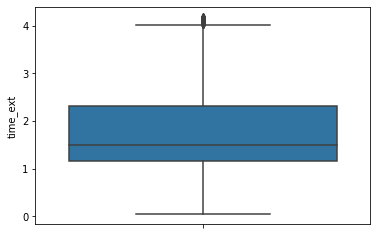

In [ ]:
#La mediana ronda los 1 hora y 5 minutos aprox (menor a la media de 1 hora y 78 minutos). Notamos ciertos outliers por encima de 4 minutos, pero desde el punto de vista práctico..
#..ese tiempo superior en extincion es una posibilidad concreta
from seaborn import boxplot
boxplot(y=df.time_ext, orient='v')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


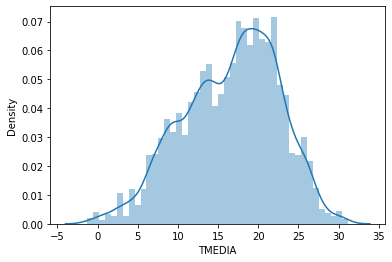

In [ ]:
#Histograma de la temperatura media en incendios
from seaborn import distplot
distplot(df.TMEDIA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


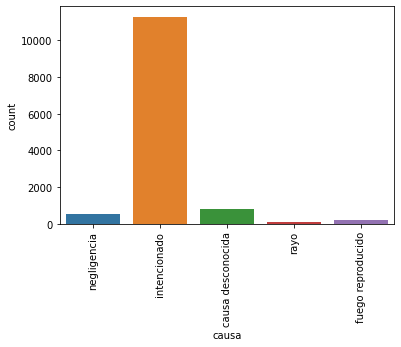

In [ ]:
#Cantidad de incendios por causa. Observamos que prevalece la causa "intencionada".
sns.countplot(df['causa'])
plt.xticks(rotation=90);

In [ ]:
#Frecuencia de las causas (misma info que el grafico anterior). Vemos que tal vez esté un poco desbalanceado el dataset (tema a analizar cuando avancemos en el proyecto)
df.causa.value_counts()

intencionado         11293
causa desconocida      830
negligencia            534
fuego reproducido      215
rayo                   104
Name: causa, dtype: int64

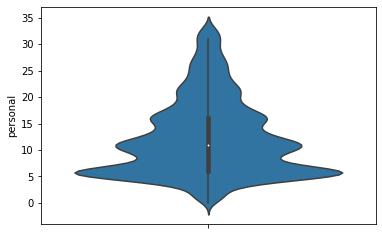

In [ ]:
#Cantidad de personal que intervino. La mediana se observa alrededor de las 10 personas, aunque la mayor cantidad de veces (frecuencia absoluta) intervinieron alrededor de 5 personas
from seaborn import violinplot
violinplot(y=df.personal,data=df, orient="vertical")


In [ ]:
df.personal.describe()

count    12976.000000
mean        12.281520
std          7.252796
min          0.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         33.000000
Name: personal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


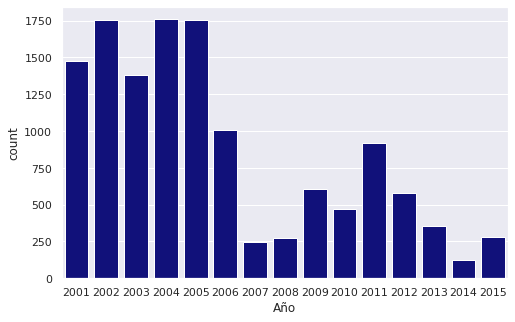

In [ ]:
#Cantidad de incendios por año. Observamos que la cantidad de incendio fue mayor en los primeros años observados (2001 a 2005)
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(df['Año'],color='darkblue')

# **ANALISIS BIVARIADO**

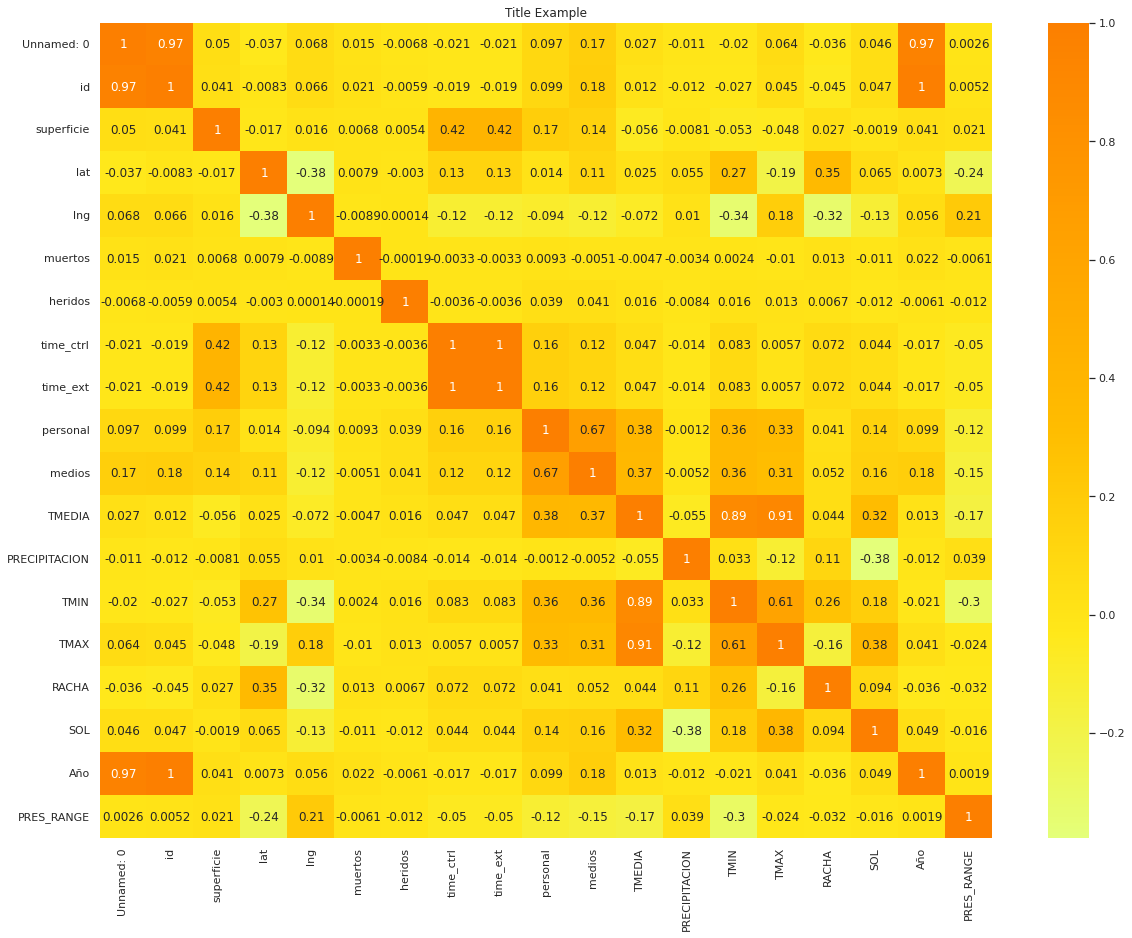

In [ ]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title("Title Example")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


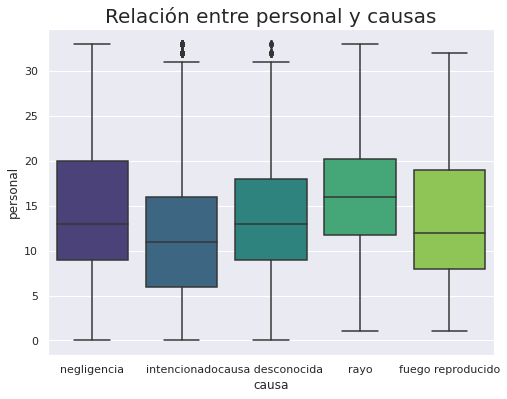

In [ ]:
# Causa vs Personal: notamos que los incendios por causas de negligencia o rayo requirieron mayor cantidad de personal para controlar el incendio
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(df['causa'], df['personal'], palette = 'viridis')
plt.title('Relación entre personal y causas', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


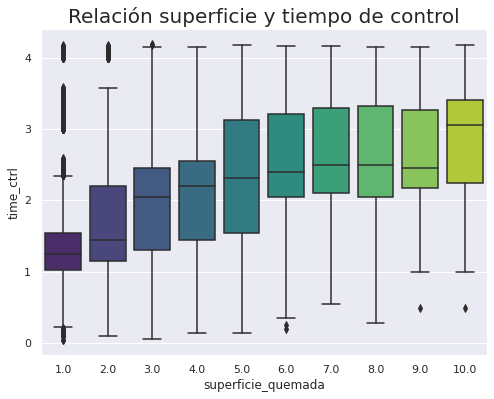

In [ ]:
# En este grafico veremos que a mayor superficie mayor es la cantidad de tiempo para controlarlo.
df['superficie_quemada']= round(df['superficie'],0)      # se redondeo la superficie para tener un grafico acorde
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(df['superficie_quemada'], df['time_ctrl'], palette = 'viridis')
plt.title('Relación superficie y tiempo de control', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


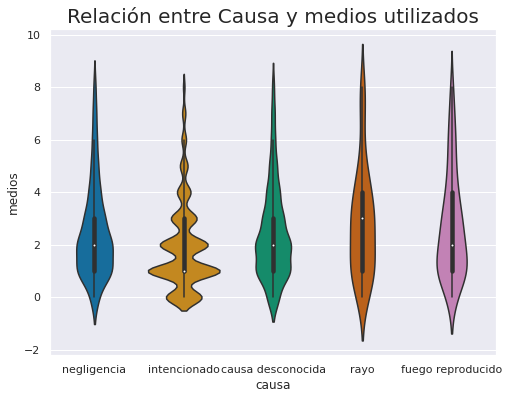

In [ ]:
# Se utilizó mayor cantidad de medios cuando la causa de incendio fue un rayo. De manera inversa, en un incendio intencionado utilizó menor cantidad de medios.
plt.rcParams['figure.figsize'] = (8, 6)
sns.violinplot(df['causa'], df['medios'], palette = 'colorblind')
plt.title('Relación entre Causa y medios utilizados', fontsize = 20, fontweight = 30)
plt.show()        

Text(0, 0.5, 'Superficie')

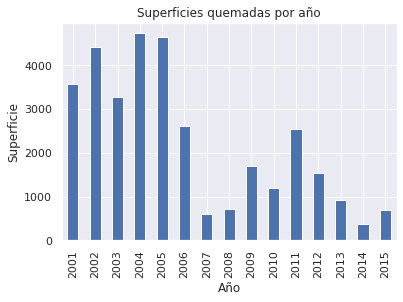

In [ ]:
# Confirmamos que no solo la cantidad de incendios fue mayor desde 2001 a 2005 (visto en analisis univariado) 
# sino que tambien las superficies quemadas fueron mayores en esos años
plt.figure(figsize=(6 ,4))
año=df.groupby('Año')['superficie'].sum().plot(kind='bar')
plt.title("Superficies quemadas por año")
plt.xlabel("Año")
plt.ylabel("Superficie")


Text(0, 0.5, 'Superficie')

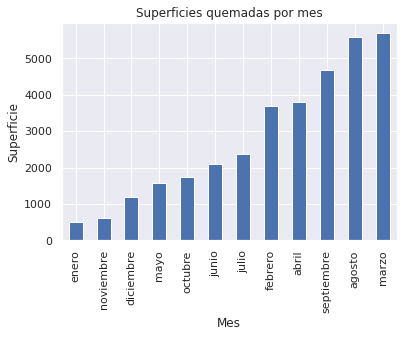

In [ ]:
#Notamos cierta estacionalidad en las superficies quemadas: las mayores se dan en marzo, agosto y septiembre. Mientras que las menores se dan en 
#noviembre, diciembre y enero
plt.figure(figsize=(6 ,4))
año=df.groupby('Mes')['superficie'].sum().sort_values().plot(kind='bar')
plt.title("Superficies quemadas por mes")
plt.xlabel("Mes")
plt.ylabel("Superficie")


# **ANALISIS MULTIVARIADO**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


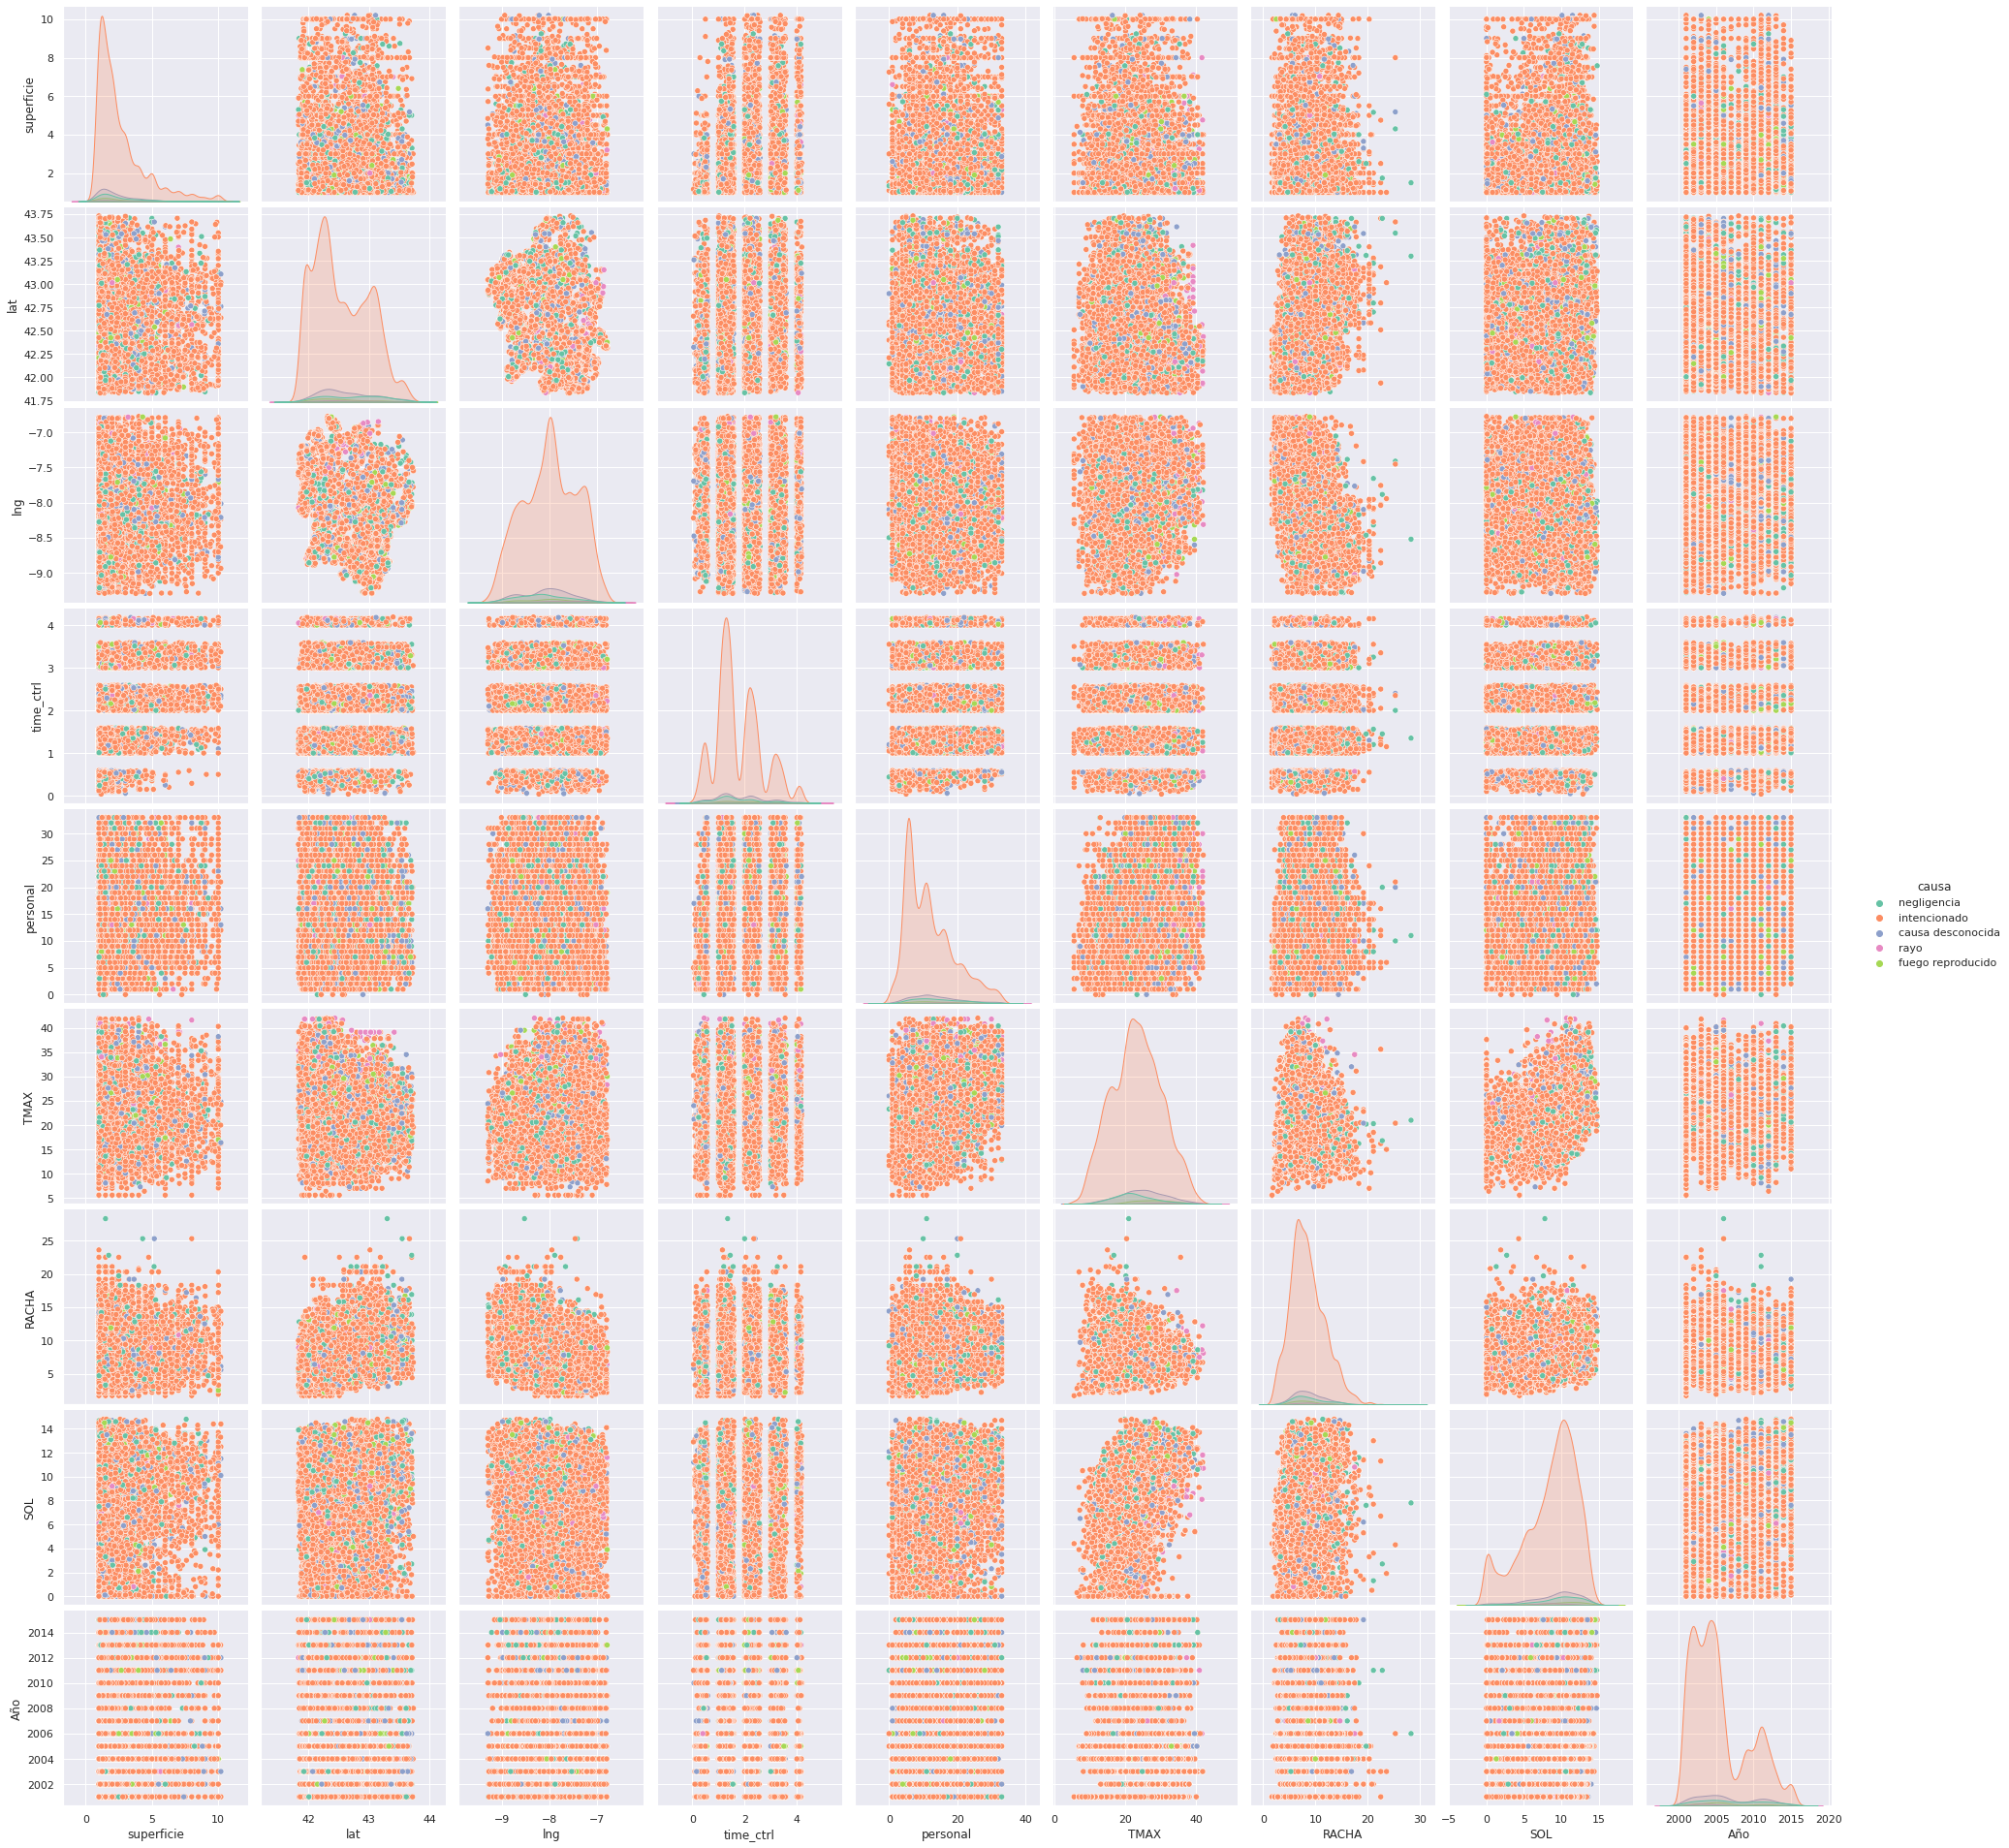

In [ ]:
#Pairplot: cruzamos las variables distinguiendo por causa. No se puede observar patrones claros.
df_=df.drop(columns=['TMIN','TMEDIA','id','heridos','muertos','Unnamed: 0','time_ext','medios','PRECIPITACION','PRES_RANGE','superficie_quemada'],inplace=False) #Dropeamos algunas columnas para que tener una mejor vista
sns.pairplot(df_,hue = 'causa' , size = 3 , palette = 'Set2')

In [ ]:
# Podemos observar algunas situaciones: hay mayor% de falta de información de gastos que de información.
# En el caso de incendios provocados por rayos, no existen registros que expongan mayores gastos a 5k
# Independientemente las causas, prevalecen los registros que exponen gastos menores a 5k respecto a los que superan los 5k
df.groupby(['causa','gastos']).size()/df.groupby(['causa']).size()

causa              gastos 
causa desconocida  < 5K       0.126506
                   >5K        0.032530
                   NO INFO    0.840964
fuego reproducido  < 5K       0.260465
                   >5K        0.065116
                   NO INFO    0.674419
intencionado       < 5K       0.133800
                   >5K        0.031967
                   NO INFO    0.834234
negligencia        < 5K       0.151685
                   >5K        0.048689
                   NO INFO    0.799625
rayo               < 5K       0.153846
                   NO INFO    0.846154
dtype: float64

In [ ]:
#Observamos que en general habría pocos incendios sin info respecto a la altitud, salvo en caso de que la causa sea un rayo (44% sin info)
df.groupby(['causa','ALTITUD']).size()/df.groupby(['causa']).size()

causa              ALTITUD       
causa desconocida  Entre 80-125      0.145783
                   Inferior a 80     0.275904
                   NO INFO           0.180723
                   Superior a 125    0.397590
fuego reproducido  Entre 80-125      0.320930
                   Inferior a 80     0.153488
                   NO INFO           0.130233
                   Superior a 125    0.395349
intencionado       Entre 80-125      0.156203
                   Inferior a 80     0.271407
                   NO INFO           0.114319
                   Superior a 125    0.458071
negligencia        Entre 80-125      0.181648
                   Inferior a 80     0.408240
                   NO INFO           0.164794
                   Superior a 125    0.245318
rayo               Entre 80-125      0.105769
                   Inferior a 80     0.038462
                   NO INFO           0.442308
                   Superior a 125    0.413462
dtype: float64

# **DATA WRANGLING**

In [ ]:
# Se coloca todas las columnas con minúsculas para poder trabajarlo mejor
df.columns=df.columns.str.lower()

In [ ]:
# Transformación de la columna fecha en ese formato
df['fecha']= pd.to_datetime(df.fecha,yearfirst=True)

In [ ]:
df.drop(['unnamed: 0','id'],axis=1,inplace=True)

In [ ]:
#Se coloca mayúscula a los datos de la columna provincia
df['idprovincia']= df['idprovincia'].str.upper()

In [ ]:
# Mapeamos la variable target. Esto se deberá confirmar con el avance del proyecto (en caso de no necesitar "one hot encoding")
df['causa']= df['causa'].map({'negligencia':1,'intencionado':2,'rayo':3,'causa desconocida':4,'fuego reproducido':5})

In [ ]:
# Mapeamos distintas variables (altitud y gastos). Esto se deberá confirmar con el avance del proyecto (en caso de no necesitar "one hot encoding")
df['altitud']= df['altitud'].map({'Inferior a 80':1, 'NO INFO':-1, 'Superior a 125':3, 'Entre 80-125':2})
df['gastos']= df['gastos'].map({'NO INFO':-1, '< 5K ':1, '>5K':2})

In [ ]:
# Vemos la última muestra del dataframe
df.head()

superficie      fecha        lat  ...  dir_viento pres_range superficie_quemada
0         5.0 2001-02-20  43.703581  ...           E        4.4                5.0
1         1.5 2001-02-25  43.186836  ...          NE        4.7                2.0
2         1.5 2001-04-13  43.699889  ...          NE        3.2                2.0
3         1.1 2001-04-13  42.758649  ...          NE        3.2                1.0
4         1.5 2001-04-13  43.063218  ...          NE        3.2                2.0

[5 rows x 28 columns]